# 3.3.2 scikit-learn Machine Learning Algorithm Implementation

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical

## 3.3.2.1 Support-vector Machine

Begin by loading the data from its directory and storing it in a pandas DataFrame object: ```iris_data```. We can take a look at the layout of ```iris_data``` using the ```head``` method from the pandas module [6]. By calling ```iris_data.head()``` we produce a DataFrame containing the first 5 samples from the dataset. We see that the DataFrame ```iris_head``` contains 5 columns: the first four consist of the four measurements (predictor variables) and the final column consists of the species of the flower (target). Each of the $150 = 5 \times 3$ rows correspond to one sample.

In [428]:
iris_data = pd.read_csv("C://Users//Sam Kettlewell//Google Drive//University Work//Third Year//MATH3001//Datasets//IRIS.csv")

In [429]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Next, we split the data into two DataFrame objects: ```X```, containing the four predictor variables sepal length, sepal width, petal length, petal width and ```y```, containing the target ```species``` for each of the 150 samples. We do this by creating new DataFrame objects by extracting specific columns of the ```iris_data``` DataFrame as demonstrated by the code in the first cell below. 

Then, using the ```train test split method``` [13] from the ```sklearn.model selection``` package [16], split each data frame into two sets: the training set containing 80 percent of the data and the test set containing remaining 20 percent.

In [430]:
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_data['species']

In [431]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2)

Now, using scikit-learn's ```svm``` method [17], we create a support-vector machine, called ```support_vector_classifier```, for classifying data. Using the fit method, train the model on the training data we generated earlier.

In [432]:
support_vector_classifier = svm.SVC(kernel = 'linear')
support_vector_classifier.fit(train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [433]:
pred_y = support_vector_classifier.predict(test_X)

Finally, we use the support-vector machine to make predictions on the test data we set aside earlier. Using the in-built ```accuracy score``` from the ```sklearn.metrics``` library [18], we conclude that our support-vector machine is 100 percent accurate in classifying samples.

In [434]:
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))

Accuracy: 1.0


## 3.3.2.2 Naive Bayes Classifier

Once again, begin by loading the data from its directory and check the layout of the data. Notice that unlike the previous support-vector machine example, the target variable is in the first column rather than the last.

In [510]:
fungus_data = pd.read_csv("C://Users//Sam Kettlewell//Google Drive//University Work//Third Year//MATH3001//Datasets//mushrooms.csv")

In [511]:
fungus_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In a similar fashion to the previous support-vector machine example, split the data into two dataframes: ```X```, containing the predictor variables and ```y```, containing the target variable. Using the ```train_test_split``` method [13] once again, randomly split the data into a training set containing 80 percent of the examples and a test set containing the remaining 20 percent.

In [512]:
X = fungus_data[fungus_data.columns[1::]] #All the columns except the targets (zeroth column)
y = fungus_data['class']

In [513]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2)

Notice that all the entries in ```fungus_data_dataframe```, and hence all the entries in ```train_X```, ```train_y```, ```test_X``` and ```test_y```, are characters. The scikit-learn naive Bayes classifier object [20] will not accept these as a valid input and if we attempt to feed this data to it, it will return an error. We will use the ```LabelEncoder``` object [21] from the ```sklearn.preprocessing``` package to solve this problem.

A LabelEncoder is an algorithm that performs the process of ```one-hot encoding```. One-hot encoding converts $N$ categorical variables into numerical variables by establishing a bijection from the set of categorical variables to the set of non-negative integers $\{0, \cdots N-1 \}$[21], an important result of this is that the function has an inverse and so the numerical variables can be decoded back to categorical variables at the end of the training process. One-hot encoding is used to ensure machine learning and deep learning algorithms can work with catgeorical data.

We instantiate a new LabelEncoder object, creatively named labelencoder, and use it to convert each column in the training and test datasets to non-negative integers. The data is now in an appropriate form for a classifier to train using it

In [514]:
labelencoder = LabelEncoder()

for each_column in train_X:
    train_X[each_column] = labelencoder.fit_transform(train_X[each_column])
    
for each_column in test_X:
    test_X[each_column] = labelencoder.fit_transform(test_X[each_column])
    
train_y = labelencoder.fit_transform(train_y)
test_y = labelencoder.fit_transform(test_y)

C:\Users\Sam Kettlewell\Anaconda3\envs\TensorFlow_AI_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Sam Kettlewell\Anaconda3\envs\TensorFlow_AI_env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Using scikit-learn, we create a Gaussian naive Bayes classifier object [22], ```naive bayes classifier```, and fit the training data to it. We can then use the classifier to to make predictions on the test set, and by comparing it to the true values of the target variable stored in ```test y```, we find the naive Bayes classifier is 92 per cent accurate in distinguishing poisonous and edible mushrooms.

In [515]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [516]:
pred_y = naive_bayes_classifier.predict(test_X)

In [517]:
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))

Accuracy: 0.92


## 3.3.2.3 Principal Component Analysis

Load the data from its directory. As principal component analysis is an unsupervised machine learning algorithm, our goal is not to predict labels, but to extract and learn meaningful representations of the data [25]. To do this, begin by creating a data frame, ```X```, containing all the four measurements of each of the 150 samples from the dataset.

In [5]:
iris_data = pd.read_csv("C://Users//Sam Kettlewell//Google Drive//University Work//Third Year//MATH3001//Datasets//IRIS.csv")

In [444]:
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

To implement PCA in scikit-learn, we instantiate a PCA object from the ```sklearn.decomposition``` [26] module and specify how many dimensions we would like to reduce the dataset to, in our case, we choose two. Note it is equally possible to select the fraction of the variance of the data you would like to retain and the PCA object will automatically reduce the dataset to the minimum number of dimensions required to capture that amount. This is shown, but commented out, in the code snippet below. 

By calling ```fit``` on the PCA object we train the model. The ```fit``` method applies the algorithm outlined in section 1.3.2.1. We can see precisely how much variance we have captured in each of our principal components by calling the ```explained_variance_ratio``` command on the PCA object after the dataset has been fit to it. The ```fit transform``` function not only fits the data to the model but also transforms it in such a way that (...).

In [445]:
iris_pca = PCA(n_components=2)
iris_pca = iris_pca.fit_transform(X)

We produce a scatter plot of the data after it has been transformed by PCA. To this end, define a Python dictionary allocating each point on the scatterplot to a colour unique to the species of Iris that the point denotes. Extract the two components from the transformed ```iris_pca``` object and plot two scatter graphs: one of both components on the x-y axis and the other of the data projected on to a one-dimensional line. We can conlude from the ```explained_variance_ratio``` property of the previous cell that the two-dimensional representation accounts for approximately 98 per cent of the variance in the dataset and the one-dimensional representation accounts for 92 per cent. This explains the high accuracy of the support-vector machine in section 3.2.2.1.

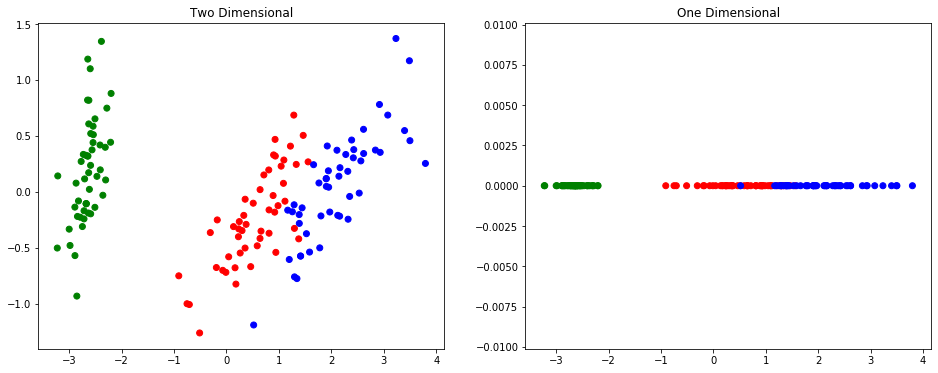

In [446]:
#Each species should be plotted in a different colour
species_colour_dict = {"virginica" : "blue",
                    "setosa" : "green",
                    "versicolor" : "red"}

#Components
principal_component = iris_pca[:,0]
secondary_component = iris_pca[:,1]

f = plt.figure(figsize= (16,6))
a1 = f.add_subplot(1,2,1)
plt.scatter(components[0], components[1], color = [species_colour_dict[species] for species in iris_data['species']])
a1.set_title('Two Dimensional')

a2 = f.add_subplot(1, 2, 2)
plt.scatter(components[0], np.zeros((150,)), color = [species_colour_dict[species] for species in iris_data['species']])
a2.set_title('One Dimensional')

plt.show()